# Understanding Data

In [17]:
import pandas as pd

df = pd.read_csv('./data/mutationc.csv')


In [18]:
# Number of unique mutations contained in the data file
number_of_unique_mutations = df.columns[1:].shape[0]  # Exclude the first column which is the sample identifier
print(f"Number of unique mutations: {number_of_unique_mutations}") #Exclude the column for sample identifier

Number of unique mutations: 1144


In [19]:
# Number of individual samples contained in the data file
sample_num = df.shape[0]
print(f"Number of samples: {sample_num}")

Number of samples: 201


In [20]:
# Number of mutations for individual C1
c1_row = df[df.iloc[:, 0] == 'C1'].iloc[0, 1:]  # Select row for C1, exclude identifier column
num_mutations_c1 = (c1_row == 1).sum()
print(f"Number of mutations for individual C1: {num_mutations_c1}")

Number of mutations for individual C1: 46


In [21]:
# Number of mutations for individual NC1
nc1_row = df[df.iloc[:,0]=='NC1'].iloc[0,1:] # Select row for NC1, exclude identifier column
num_mutations_nc1 = (nc1_row == 1).sum()
print(f"Number of mutations for individual NC1: {num_mutations_nc1}")

Number of mutations for individual NC1: 6


In [22]:
# The average number of mutations per individual
mutation_data = df.iloc[:,1:] #data excluding classifier
total_mutations = (mutation_data==1).sum(axis=1).sum()
avg_mutations_per_individual = total_mutations/sample_num
print(f"Average number of mutations per individual: {avg_mutations_per_individual:.3f}")

Average number of mutations per individual: 15.104


In [23]:
#The minimum and maximum number of mutations per individual
mutation_counts = (mutation_data==1).sum(axis=1)
max_idx = mutation_counts.idxmax()
min_idx = mutation_counts.idxmin()

max_id = df.iloc[max_idx,0]
min_id = df.iloc[min_idx,0]

print(f"Maximum number of mutations is {mutation_counts[max_idx]} for individual {max_id}")
print(f"Minimum number of mutations is {mutation_counts[min_idx]} for individual {min_id}")

Maximum number of mutations is 204 for individual C0
Minimum number of mutations is 1 for individual NC4


In [24]:
# Number of individuals who have a mutation in the ‘BRAF’ gene
braf_cols = df.columns[df.columns.str.contains('BRAF')]
num_braf_mutations = (df[braf_cols] == 1).sum(axis=1)
num_individuals_braf = (num_braf_mutations > 0).sum()
print(f"Number of individuals with a mutation in the ‘BRAF’ gene: {num_individuals_braf}")

Number of individuals with a mutation in the ‘BRAF’ gene: 33


In [25]:
# Number of individuals who have a mutation in the ‘KRAS’ gene
kras_cols = df.columns[df.columns.str.contains('KRAS')]
num_kras_mutations = (df[kras_cols] == 1).sum(axis=1)
num_individuals_kras = (num_kras_mutations > 0).sum()
print(f"Number of individuals with a mutation in the ‘KRAS’ gene: {num_individuals_kras}")


Number of individuals with a mutation in the ‘KRAS’ gene: 72


In [26]:
# The average number of individuals per mutation
avg_individuals_per_mutation = total_mutations/number_of_unique_mutations
print(f"Average number of individuals per mutation: {avg_individuals_per_mutation:.3f}")


Average number of individuals per mutation: 2.654


In [27]:
# The minimum and maximum number of individuals per mutation
mutation_counts_col = (mutation_data == 1).sum(axis=0)
min_individuals_per_mutation = mutation_counts_col.min()
max_individuals_per_mutation = mutation_counts_col.max()
min_mutation_name = mutation_counts_col.idxmin()
max_mutation_name = mutation_counts_col.idxmax()

print(f"Minimum number of individuals for a mutation: {min_individuals_per_mutation} ({min_mutation_name})")
print(f"Maximum number of individuals for a mutation: {max_individuals_per_mutation} ({max_mutation_name})")

Minimum number of individuals for a mutation: 1 (HEPACAM_GRCh37_11:124794736-124794736_Silent_SNP_G-G-A_G-G-T)
Maximum number of individuals for a mutation: 42 (KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G)


# Preprocessing Data

In [28]:
import matplotlib.pyplot as plt

In [29]:
df.index

RangeIndex(start=0, stop=201, step=1)

In [30]:
total_mutations

np.int64(3036)

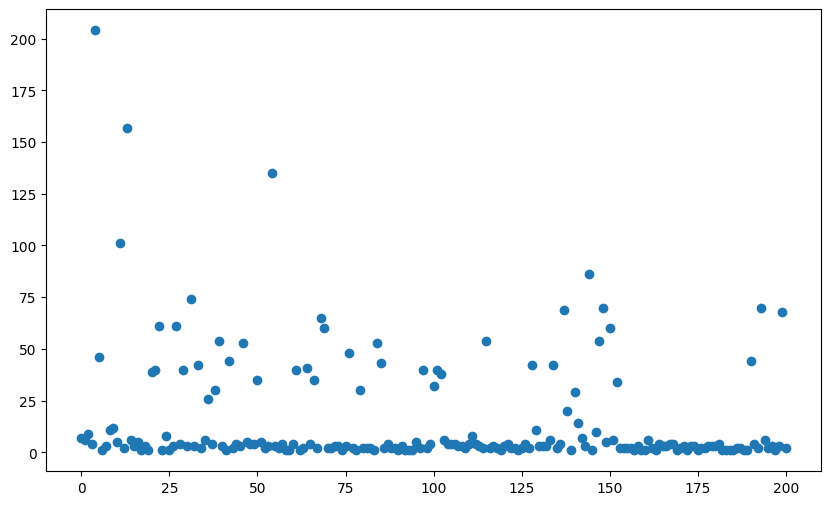

In [31]:
#  identify outlier samples with scatterplot
total_mutations_each_sample = (mutation_data==1).sum(axis=1)
plt.figure(figsize=(10,6))
plt.scatter(df.index,total_mutations_each_sample)

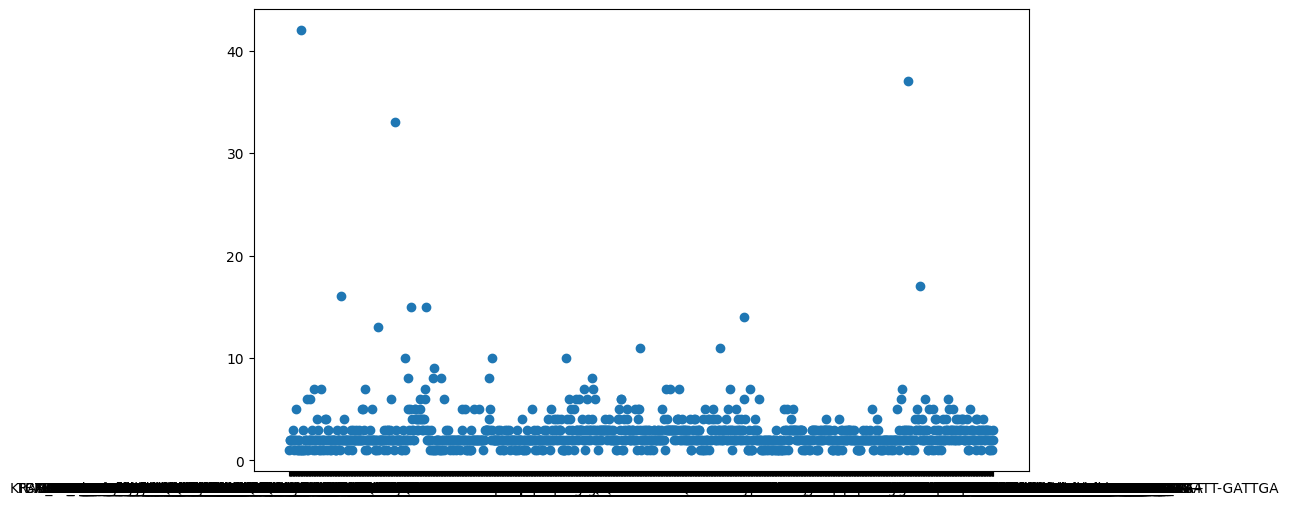

In [32]:
# identify outlier mutations with scatterplot
mutation_each_individual = (mutation_data==1).sum(axis=0)
plt.figure(figsize=(10,6))
plt.scatter(mutation_data.columns,mutation_each_individual)

## Explore how the individual genetic mutations relate to the two categories of samples.

In [33]:
# top 10 features (mutations) when ranked by T (total occurrences in all samples)
sorted_mutation_counts = mutation_each_individual.sort_values(ascending=False)
sorted_mutation_counts.head(10)

KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    42
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               37
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               33
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                               17
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                 16
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               15
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                15
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T                  14
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                  13
APC_GRCh37_5:112174631-112174631_Nonsense-Mutation_SNP_C-C-T                11
dtype: int64

In [34]:
# top 10 features (mutations) when ranked by C (total occurrences in C samples)
identifier_col = df.columns[0] 

df_C = df[df[identifier_col].str.match(r'^C\d+$')]
df_C_mutation_data = df_C.iloc[:,1:]
mutation_each_individual_C = (df_C_mutation_data==1).sum(axis=0)
mutation_each_individual_C_sorted = mutation_each_individual_C.sort_values(ascending=False)
mutation_each_individual_C_sorted.head(10)

BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               28
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               27
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    25
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                               13
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               13
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                11
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                  11
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                 10
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G                  8
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--               7
dtype: int64

In [35]:
# top 10 features (mutations) when ranked by NC (total occurrences in NC samples)

df_NC = df[df[identifier_col].str.match(r'^NC\d+$')]
df_NC_mutation_data = df_NC.iloc[:,1:]
mutation_each_individual_NC = (df_NC_mutation_data==1).sum(axis=0)
mutation_each_individual_NC_sorted = mutation_each_individual_NC.sort_values(ascending=False)
mutation_each_individual_NC_sorted.head(10)

KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    17
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               10
TP53_GRCh37_17:7577538-7577538_Missense-Mutation_SNP_C-C-T                   7
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T                   7
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                  6
TP53_GRCh37_17:7577094-7577094_Missense-Mutation_SNP_G-G-A                   6
TP53_GRCh37_17:7577539-7577539_Missense-Mutation_SNP_G-G-A                   6
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T                5
APC_GRCh37_5:112162891-112162891_Nonsense-Mutation_SNP_C-C-T                 5
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                 4
dtype: int64

In [36]:
# top 10 features (mutations) when ranked by %C (the percentage of ALL cancer samples containing mutation ‘i’)
mutation_each_individual_C_percentage = mutation_each_individual_C / df_C.shape[0] * 100
mutation_each_individual_C_percentage.sort_values(ascending=False).head(10)

BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               26.923077
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               25.961538
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    24.038462
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                               12.500000
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               12.500000
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                10.576923
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                  10.576923
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                  9.615385
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G                  7.692308
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--               6.730769
dtype: float64

In [37]:
# top 10 features (mutations) when ranked by %NC (the percentage of ALL non cancer samples containing mutation ‘i’)
mutation_each_individual_NC_percentage = mutation_each_individual_NC / df_NC.shape[0] * 100
mutation_each_individual_NC_percentage.sort_values(ascending=False).head(10)

KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G    17.525773
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               10.309278
TP53_GRCh37_17:7577538-7577538_Missense-Mutation_SNP_C-C-T                   7.216495
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T                   7.216495
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--                  6.185567
TP53_GRCh37_17:7577094-7577094_Missense-Mutation_SNP_G-G-A                   6.185567
TP53_GRCh37_17:7577539-7577539_Missense-Mutation_SNP_G-G-A                   6.185567
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T                5.154639
APC_GRCh37_5:112162891-112162891_Nonsense-Mutation_SNP_C-C-T                 5.154639
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                 4.123711
dtype: float64

In [38]:
# top 10 features (mutations) when ranked by %C - %NC
mutation_diff = mutation_each_individual_C_percentage - mutation_each_individual_NC_percentage
mutation_diff.sort_values(ascending=False).head(10)

BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T               21.768438
DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C                               15.652260
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--               10.438144
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--                   8.515067
DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T                                8.376289
SVIL_GRCh37_10:29760116-29760116_Frame-Shift-Del_DEL_C-C--                   6.730769
RAB28_GRCh37_4:13485808-13485808_5'UTR_DEL_G-G--                             6.730769
PLEKHA6_GRCh37_1:204228411-204228411_Frame-Shift-Del_DEL_C-C--               6.730769
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G     6.512688
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T                 6.453212
dtype: float64

In [39]:
# top 10 features (mutations) when ranked by %C / %NC
import numpy as np
safe_nc_percentage = mutation_each_individual_NC_percentage.replace(0, np.nan)
mutation_ratio = mutation_each_individual_C_percentage / safe_nc_percentage
mutation_ration_filled = mutation_ratio.fillna(0)
mutation_ratio.sort_values(ascending=False).head(10)


XYLT2_GRCh37_17:48433967-48433967_Frame-Shift-Del_DEL_C-C--        6.528846
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--      6.062500
UBQLN2_GRCh37_X:56591874-56591874_Frame-Shift-Del_DEL_C-C--        5.596154
MICAL3_GRCh37_22:18300932-18300932_Frame-Shift-Del_DEL_G-G--       5.596154
PIK3CA_GRCh37_3:178952085-178952085_Missense-Mutation_SNP_A-A-G    5.596154
BRAF_GRCh37_7:140453136-140453136_Missense-Mutation_SNP_A-A-T      5.223077
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--         5.129808
PIK3CA_GRCh37_3:178936082-178936082_Missense-Mutation_SNP_G-G-A    4.663462
ZDHHC8_GRCh37_22:20130522-20130522_Frame-Shift-Del_DEL_C-C--       4.663462
APC_GRCh37_5:112116592-112116592_Nonsense-Mutation_SNP_C-C-T       4.663462
dtype: float64